# Wondrous Numbers, Hailstone Numbers, and Unsolved Problems 

## Learning Goals:
- Practice basic computer science skills including recursion and modular arithmetic
- Explore plotting and data visualization
- Learn some things about number theory

## Introduction

Here we are going to investigate a seemingly simple problem in math that turns out to exhibit some complicated behaviors and turns out to be unsolved. The problem is known as the Collatz conjecture. [Wikipedia](https://en.wikipedia.org/wiki/Collatz_conjecture) and [WolframMathWorld](https://mathworld.wolfram.com/CollatzProblem.html) have good aticles about the problem. 

### The Problem

The Collatz conjecture concerns a sequence of numbers that can be described as follows: ffrst we start with any input number $x$ (where $x$ is a positive integer). If $x$ is even, then the next number in the sequence is $\frac{x}{2}$, while if $x$ is odd, the next number in the sequence is $3 x + 1$. We can see that if $x= 1$, the sequence will go $1 \rightarrow 4 \rightarrow 2 \rightarrow 1 \dots$. This squence of 1,4,2,1,4,2 would repeat forever. So typically we are only interested in the sequence until it reaches 1 and then we stop. 

The conjecture states that all starting numbers will eventually reach 1.    

### Why it's Hard

Even though this problem seems simple to understand compared to many other advanced math problems, it turns out that it is currently unsolved. All numbers checked so far do reach 1, but it is unclear if there is some number which will lead to a sequence that never reaches 1. Several mathematicians have noted its difficulty, including [Paul Erdős](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s) who said that ''Mathematics may not be ready for such problems'' and offered 500 dollars for its solution. The reason why the problem is difficult will become clear as we investiagte it, but it arises mostly from the fact that some numbers have complicated paths to reaching 1 and it's difficult to show that no [cycles](https://en.wikipedia.org/wiki/Cycle_(graph_theory)) exist for some large numbers.

In [41]:
# Import packages for scientific computing and plotting:
import numpy as np
import matplotlib.pyplot as plt

Let's write a function to test out some inputs. We will call our function 'wonder' because the numbers whose inputs evntually result in 1 are sometimes called 'wondrous numbers'. As noted by [Douglas Hofstader](https://en.wikipedia.org/wiki/Douglas_Hofstadter) in the great book [GEB](https://en.wikipedia.org/wiki/G%C3%B6del,_Escher,_Bach) (which is largely about how simple system rules can create complex system behaviors), if the Collatz Conjecture is true, then all numbers (or positive integers at least) are wonderous numbers. We will write our function as a simple recursive function that prints each step in the sequence and terminates when 1 is reached.  

In [5]:
'''This recursive function tries to determine if a given natural number is a 'wondrous' number.'''
def wonder(n):
    # Print the current number
    print(n)
    # Check if we reached 1. If not, we continue. If we reached 1, we're done.
    if n != 1:
        # Check if n is even:
        if n % 2 == 0:
            # If it is even, (integer) divide it by 2 and recursively call this function on that number.
            wonder(n // 2)
        else:
            # If it is odd, multiply it by 3 and add 1 and recursively call this function on that number.
            wonder(3 * n + 1)
    # If we're done, we don't call the function again. Just print 'Wonder!'
    else:
        print('Wonder!')

Let's test out the function on some input, say $x = 5$.

In [6]:
wonder(5)

5
16
8
4
2
1
Wonder!


Now let's check a more interesting example with $x=27$:

In [7]:
wonder(27)

27
82
41
124
62
31
94
47
142
71
214
107
322
161
484
242
121
364
182
91
274
137
412
206
103
310
155
466
233
700
350
175
526
263
790
395
1186
593
1780
890
445
1336
668
334
167
502
251
754
377
1132
566
283
850
425
1276
638
319
958
479
1438
719
2158
1079
3238
1619
4858
2429
7288
3644
1822
911
2734
1367
4102
2051
6154
3077
9232
4616
2308
1154
577
1732
866
433
1300
650
325
976
488
244
122
61
184
92
46
23
70
35
106
53
160
80
40
20
10
5
16
8
4
2
1
Wonder!


There are a lot of numbers here, so it's difficult to understand exactly what's going on, but clearly 27 has a a complicated path to 1. In order to better see what's going on, let's write a new function that will store the whole sequence and plot it.

In [38]:
'''
This function plots the Collatz sequence for a number
'''
def wonder_sequence_plot(n):
    nvals = [n]
    idxs = [1]
    i = 1
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        nvals.append(n)
        i += 1
        idxs.append(i) 
    plt.plot(idxs, nvals, 'r.')
    plt.show()
        

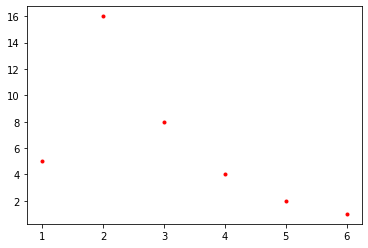

In [39]:
wonder_sequence_plot(5)

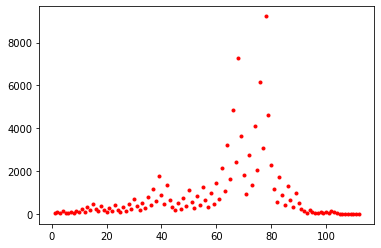

In [40]:
wonder_sequence_plot(27)

We can see that while the sequence starting at $x = 5$ only takes 6 steps to reach 1 and reaches a max value of 16, the sequence starting at $x = 27$ takes over 100 steps to reach 1 and jumps up to around 2,000 before coming back down, then jumping up to over 8000 and evntually sinking back to 1. 

Let's rewrite the above function (instead of actually rewriting it as we normally might do, let's just create a new one below for the sake of the notebook tutorial) so that we can compare multiple plots side by side to compare them. 

In [86]:
'''

'''
def multi_wonder_sequence_plot(ns):
    figsize =(12*len(ns), 6*len(ns))
    plt.rcParams.update({'font.size': figsize[1]})
    fig, axs = plt.subplots(1, len(ns), figsize=figsize)
    fig.tight_layout(h_pad=len(ns), w_pad=2*len(ns))
    fig.subplots_adjust(top = 0.9)
    fig.suptitle('Collatz Sequence for Numbers ' + ', '.join([str(n) for n in ns]))
    for i, n in enumerate(ns):
        nvals = [n]
        idxs = [1]
        j = 1
        while n != 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            nvals.append(n)
            j += 1
            idxs.append(j)
        axi = axs[i]
        axi.plot(idxs, nvals, 'r-')
        axi.set_title("Starting at " + str(nvals[0]))
        axi.set(xlabel='Step Index', ylabel='Sequence Value')
    plt.show()

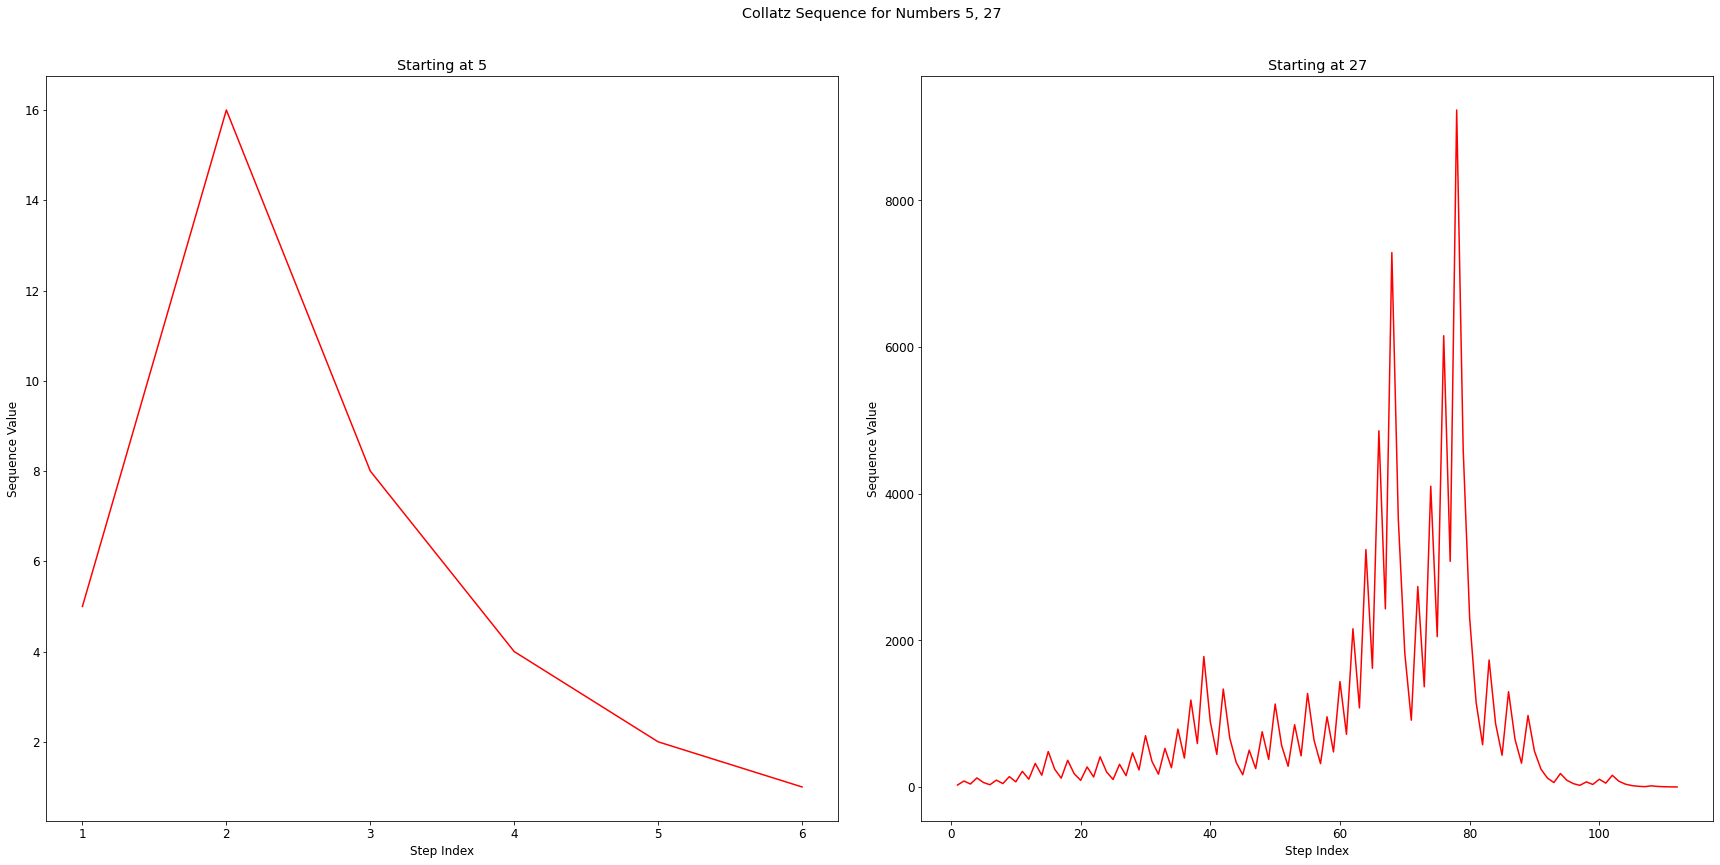

In [91]:
multi_wonder_sequence_plot([5, 27])

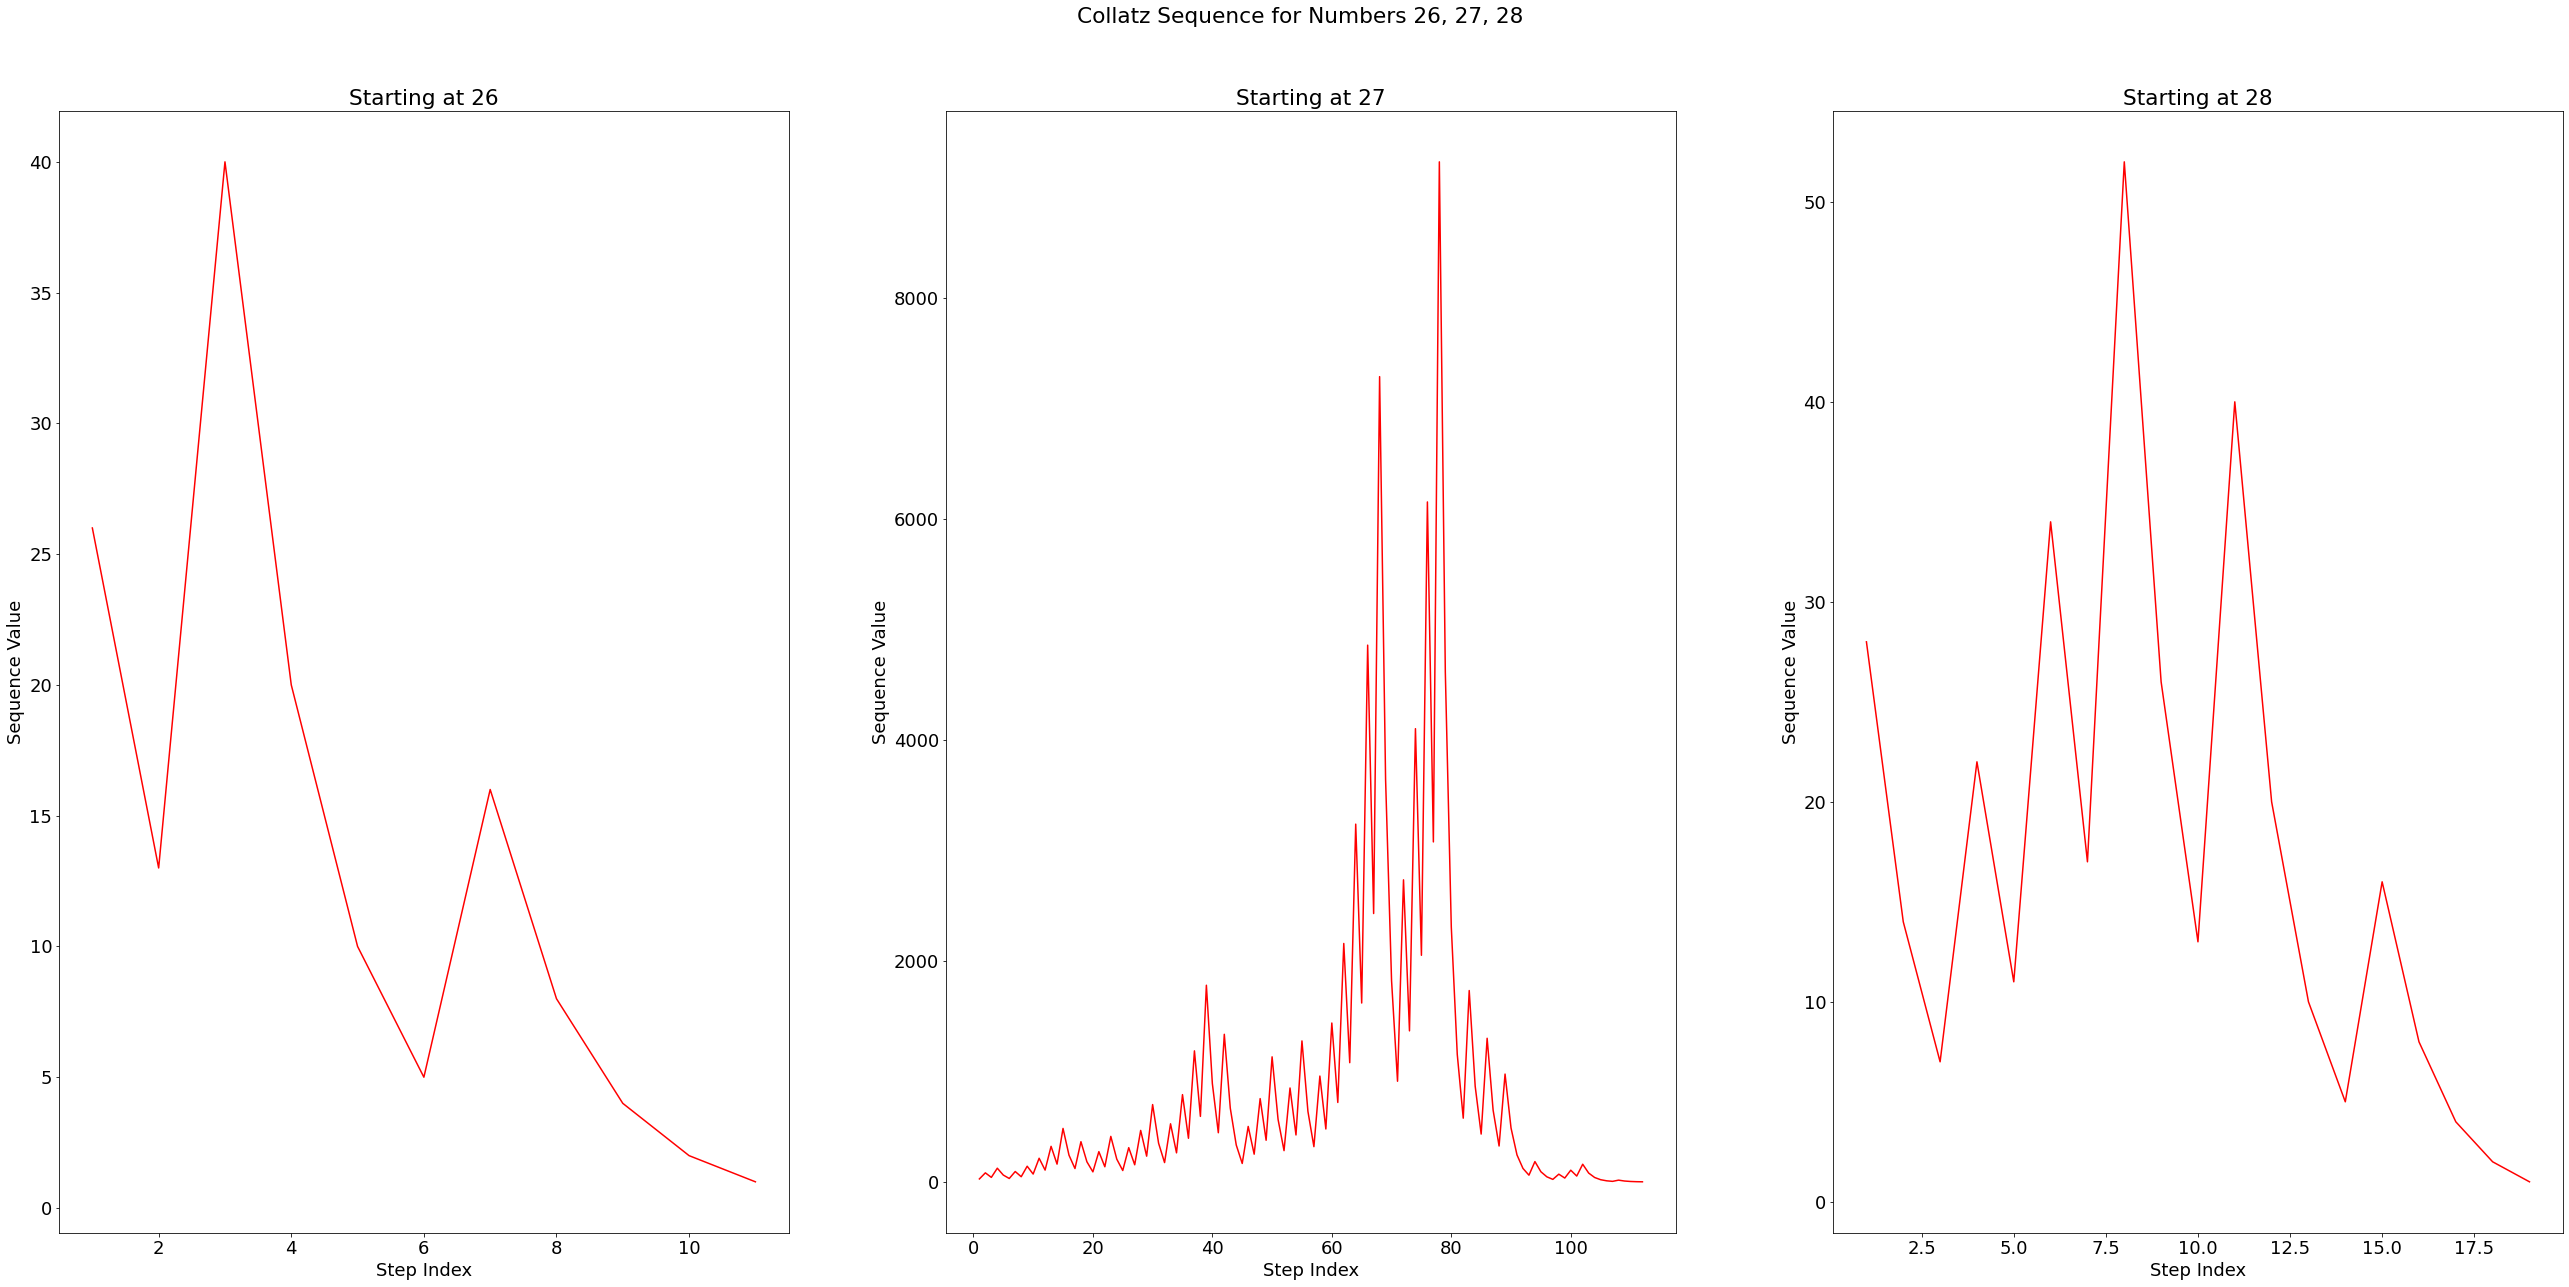

In [88]:
multi_wonder_sequence_plot([26, 27, 28])

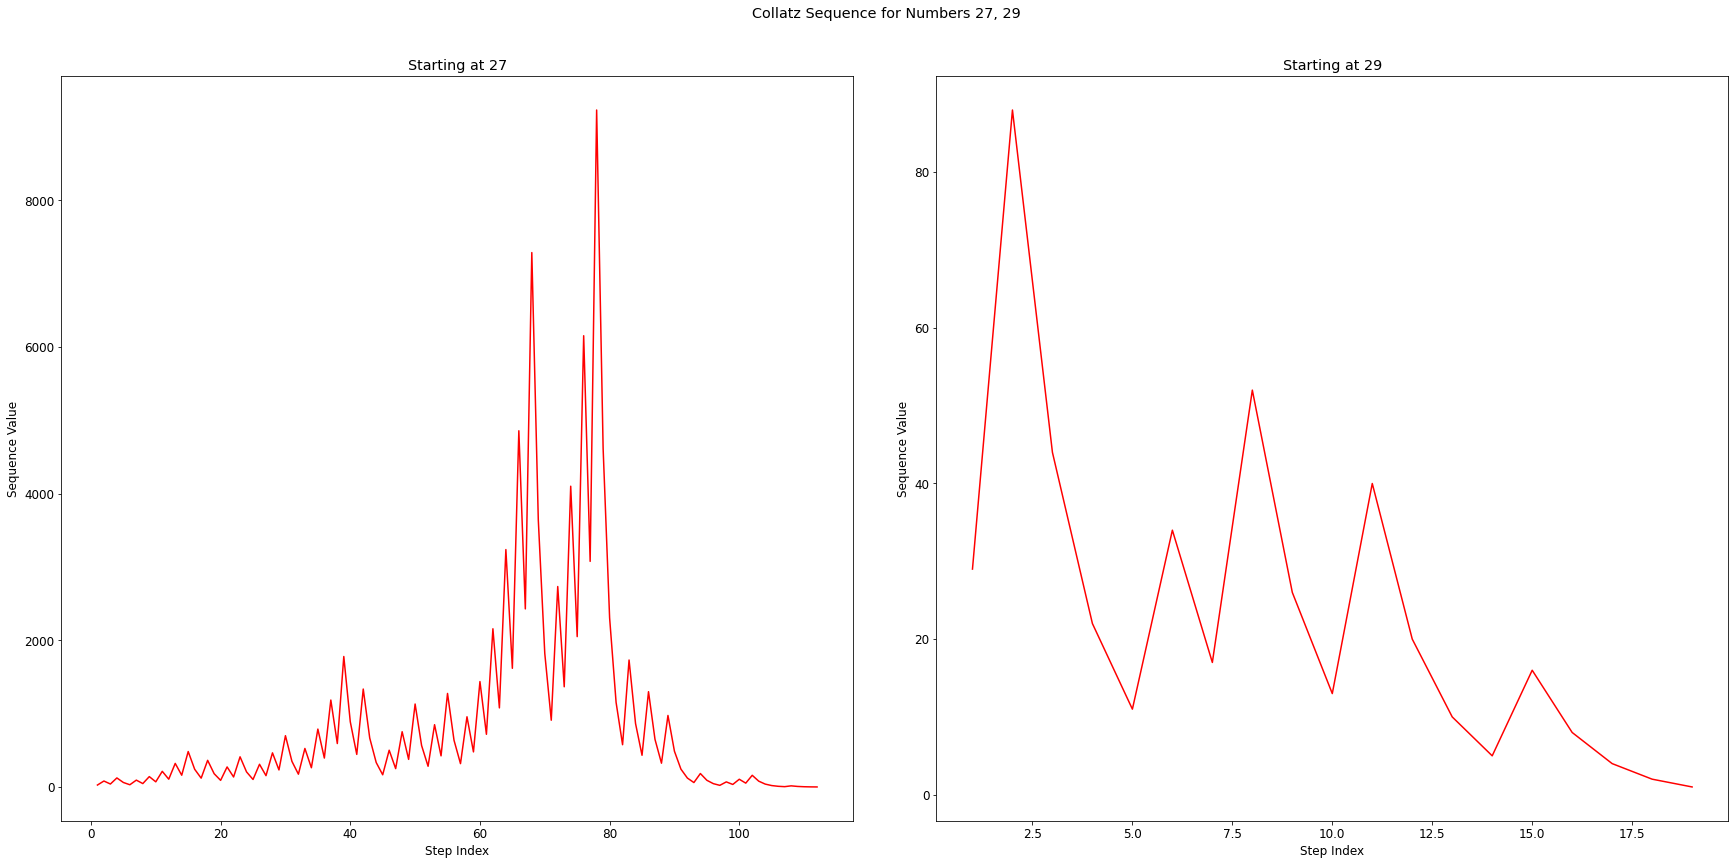

In [90]:
multi_wonder_sequence_plot([27, 29])

In [115]:
'''

'''
def wonder_stopping_time(N):
    plt.style.use('default')
    stopTimes = []
    for startN in range(1, N+1):
        n= startN
        j = 1
        while n != 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            j += 1
        stopTimes.append(j)
    plt.plot(list(range(1, N+1)), stopTimes, 'b.')
    plt.title('Stopping Time for Numbers up to ' + str(N))
    plt.xlabel('Starting Number')
    plt.ylabel('Stopping Time')
    plt.show()

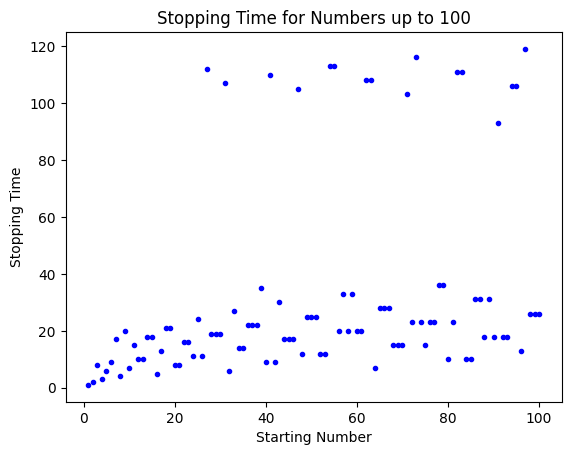

In [116]:
wonder_stopping_time(100)

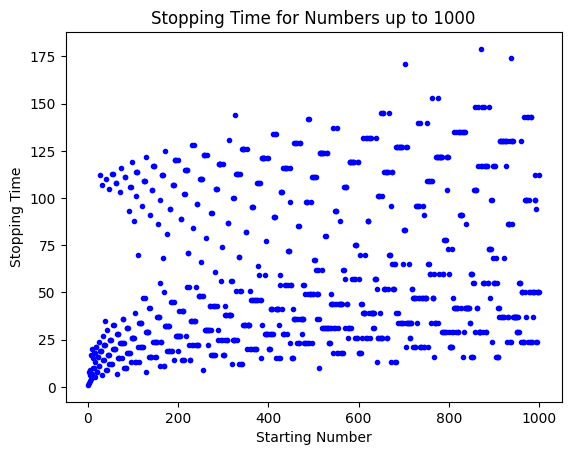

In [118]:
wonder_stopping_time(1000)

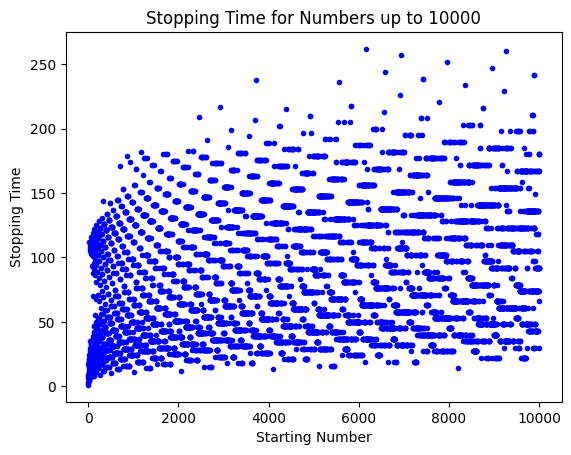

In [119]:
wonder_stopping_time(10000)

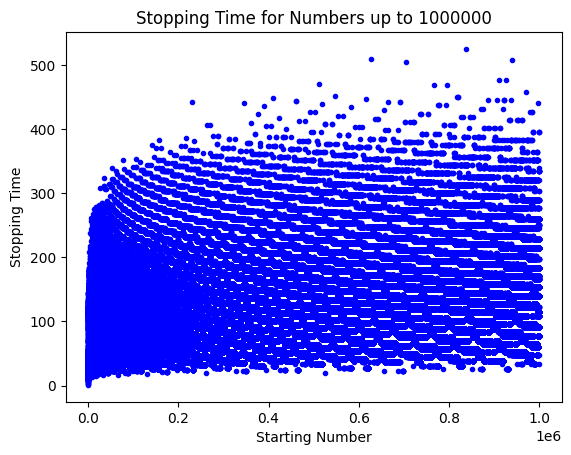

In [121]:
wonder_stopping_time(10**6)